In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### Introduction

In [ ]:
data_df = pd.read_csv("creditcard.csv")
print("Rows:",data_df.shape[0]," Columns:", data_df.shape[1])

Rows: 284807  Columns: 31


Dataset contains only numerical input variables which are the result of a PCA transformation due to confidentiality issues. Original features and more background information about the data are not provided.
The only features which have not been transformed with PCA are Time and Amount.

Features V1, V2, ... V28 are the principal components obtained with PCA.

Time contains the seconds elapsed between each transaction and the first transaction in the dataset. 

Amount is the transaction amount.

Feature Class takes value 1 in case of fraud and 0 in case of not fraud.

In [ ]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Look into more details to the data

In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check missing values

In [ ]:
total = data_df.isnull().sum()
total

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the entire dataset.

### Data unbalance

   Class  values
0      0  284315
1      1     492


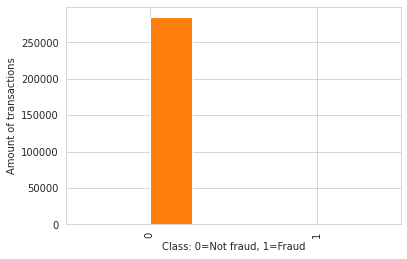

In [ ]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})
print(df)

df.plot(kind='bar', legend=False, xlabel="Class: 0=Not fraud, 1=Fraud", ylabel="Amount of transactions")


Only 492 (or 0.172%) of transaction are frauds. That means the data is highly unbalanced with respect with target variable Class. Undersampling or oversampling could be used, but I decided not to since undersampling could drop a lot of information since we dont know which of the anonymous features are most useful and which are not, and oversampling could make the models overfit.

Now we check if the transaction amount differs between the classes

In [ ]:
print ("Fraud")
print (data_df.Amount[data_df.Class == 1].describe())
print ()
print ("Normal")
print (data_df.Amount[data_df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


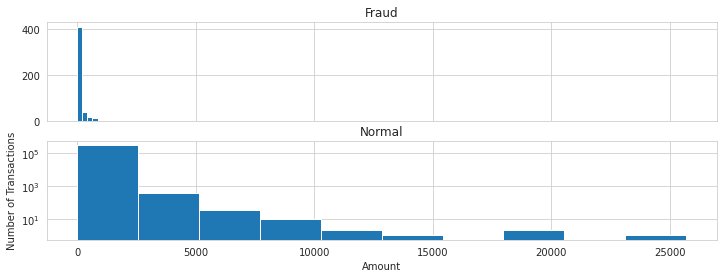

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 10

ax1.hist(data_df.Amount[data_df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_df.Amount[data_df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

We can see that most transactions are small amounts, less than 100\$, but the fraudulent transactions have far lower maximum value, 2125\$ vs 25691\$

Let's compare Time with Amount and see if we can learn anything new.

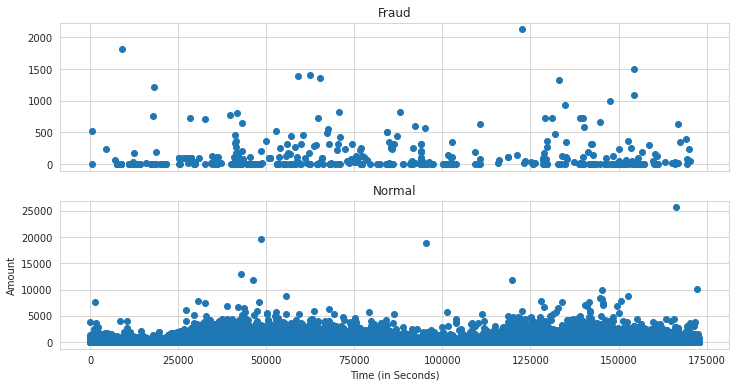

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(data_df.Time[data_df.Class == 1], data_df.Amount[data_df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(data_df.Time[data_df.Class == 0], data_df.Amount[data_df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In my opinion nothing useful here.

### Features correlation

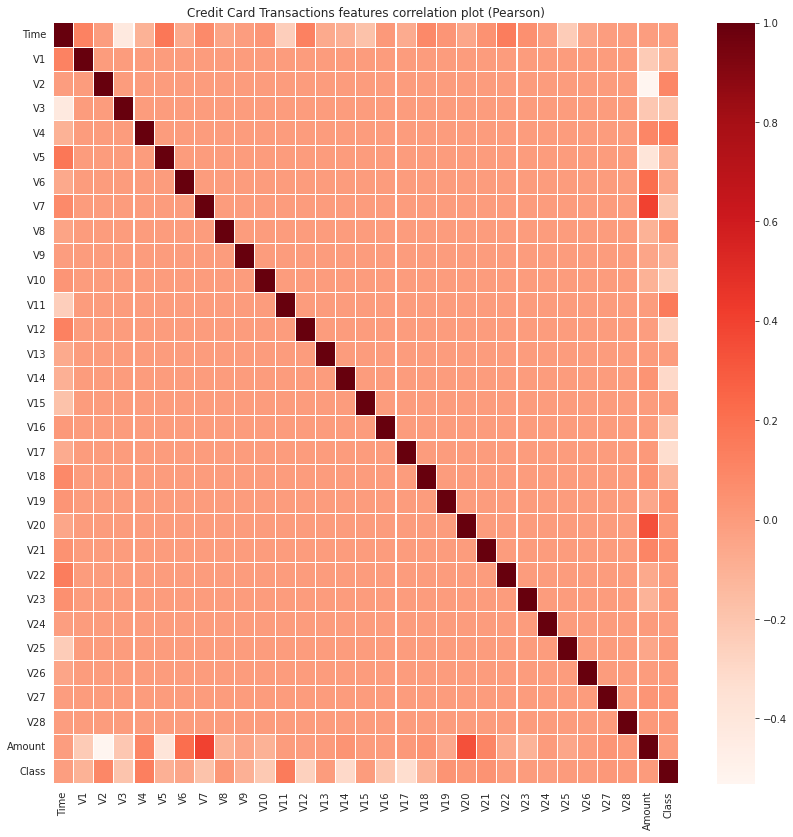

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

We can plot the direct and inverse correlated values on graphs.

Direct correlated values: V20-Amount and V7-Amount

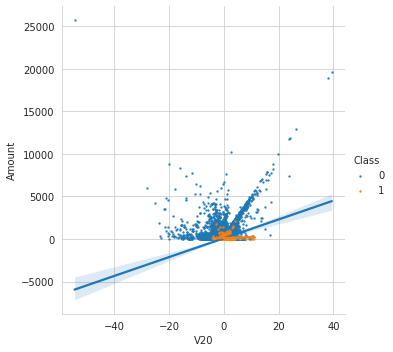

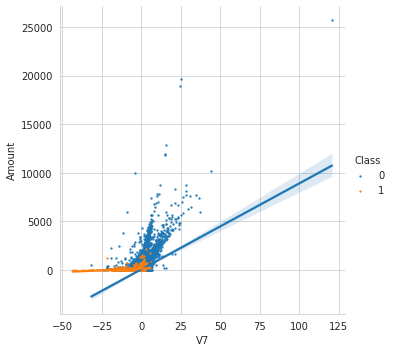

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for both the Class = 0 and Class = 1 have a positive slope (albeit very small for Class = 1)).

Now the inverse correlated values: V2-Amount, V5-Amount

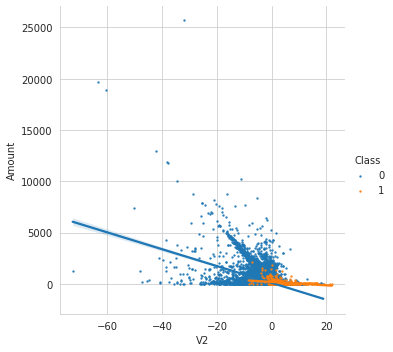

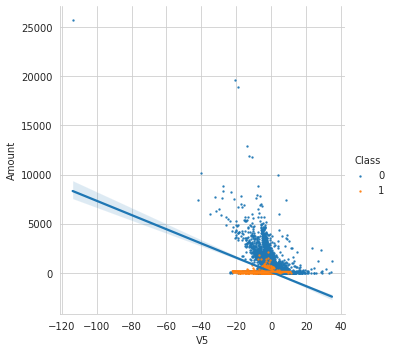

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for both the Class = 0 and Class = 1 have a negative slope (albeit very small for Class = 1)).

### Features density plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

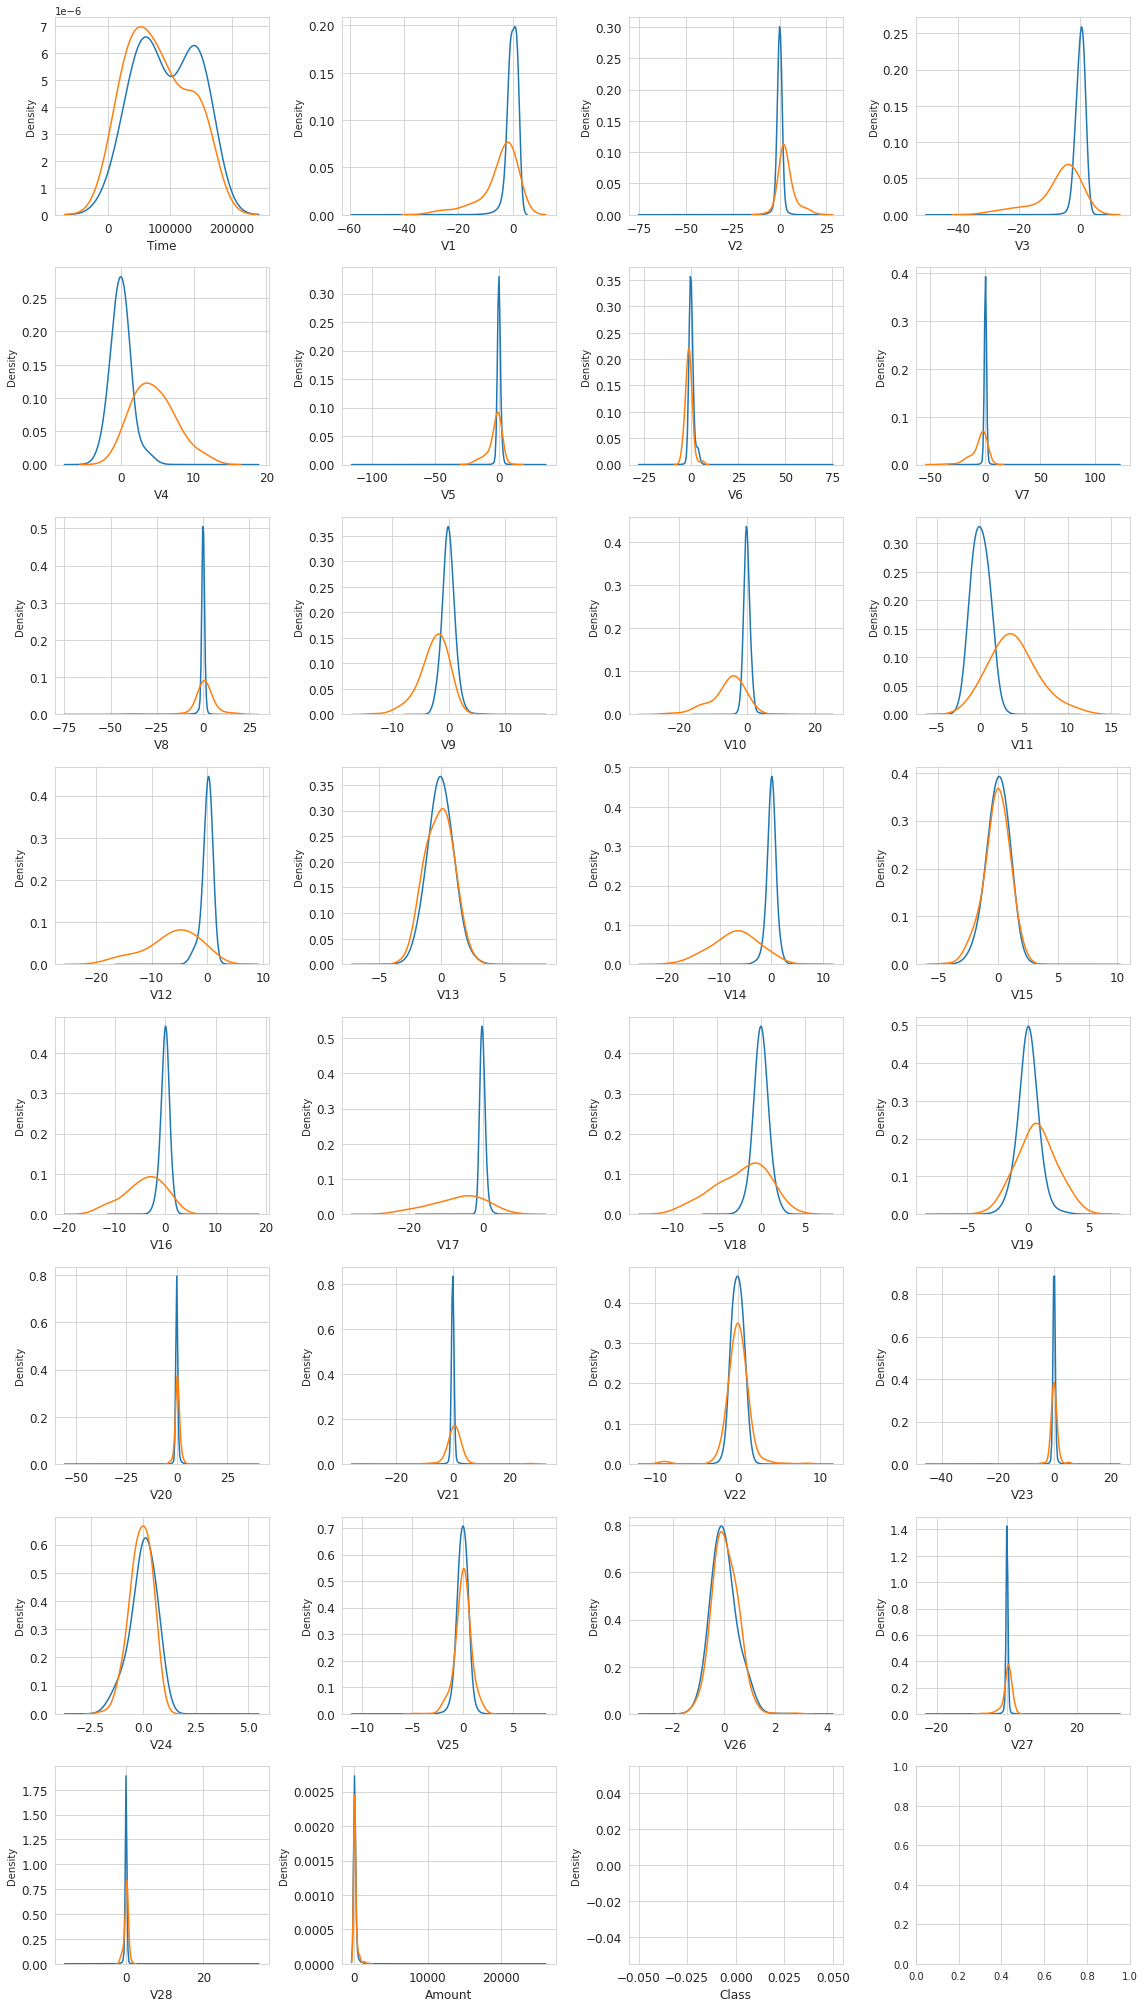

In [ ]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show();

We can observe that there is good selectivity in terms of distributions for the Class values 0 and 1. For example:

Class: V4, V11 have clearly separated distributions, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V22, V24, V25, V26, V28 have similar profiles for the two values of Class.

In general, with exeptions of Time and Amount, the features distribution for legitimate transactions (values of Class = 0) is centered around 0. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Predictive models

Define predictors and target values. I decided to not include features: 'V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8' since they had very similar distributions for both classes and would not be helpful when trying to distinguish between fraudulent/non fraud transactions. (I also tried using all features and the results were slightly worse, so I guess it was right choice)

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
              'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
              'V17', 'V18', 'V19', 'V20', 'V21', 'Amount']


Define train, validation and test sets.

In [ ]:
TEST_SIZE = 0.2
VALID_SIZE = 0.2
RANDOM_STATE = 42

bigger_train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(bigger_train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

I will train multiple models and compare them

### Random Forest Classifier

Define the model

In [ ]:
NUM_ESTIMATORS = 100 
N_JOBS = 4

clf = RandomForestClassifier(n_jobs=N_JOBS, 
                             random_state=RANDOM_STATE,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Train the model using the training data

In [ ]:
clf.fit(bigger_train_df[predictors], bigger_train_df[target])

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

Get predictions for the target value for the test data

In [ ]:
preds = clf.predict(test_df[predictors])

Visualize the confusion matrix

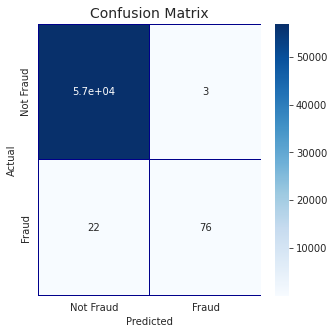

In [ ]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Calculate the Area Under Curve score, since pure accuracy is not very uselful here since the non fraudulent data is not hard to predict correctly and we would have 99.999+% accuracy but for the non fraud cases only.

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.8877287233126226

Lets also visualize the feature importances to see which features are most important

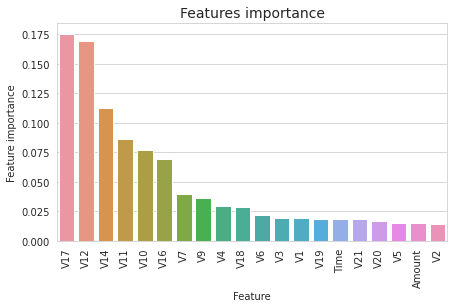

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### XGBooost

Prepare data for XGBoost

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target])
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target])
dtest = xgb.DMatrix(test_df[predictors], test_df[target])

Prepare what data to monitor and define parameters for XGBoost

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.05
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

MAX_ROUNDS = 1000
VERBOSE_EVAL = 50 #Print out metric result
IS_LOCAL = False

Train the model for 1000 rounds

In [ ]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist,  
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.827143	valid-auc:0.812399
[50]	train-auc:0.920954	valid-auc:0.929452
[100]	train-auc:0.965904	valid-auc:0.959409
[150]	train-auc:0.987264	valid-auc:0.979295
[200]	train-auc:0.991443	valid-auc:0.981353
[250]	train-auc:0.993272	valid-auc:0.983995
[300]	train-auc:0.99467	valid-auc:0.985316
[350]	train-auc:0.995986	valid-auc:0.986366
[400]	train-auc:0.996993	valid-auc:0.986732
[450]	train-auc:0.997916	valid-auc:0.987368
[500]	train-auc:0.998388	valid-auc:0.987619
[550]	train-auc:0.998716	valid-auc:0.988
[600]	train-auc:0.999027	valid-auc:0.98925
[650]	train-auc:0.999277	valid-auc:0.990281
[700]	train-auc:0.999464	valid-auc:0.990159
[750]	train-auc:0.999582	valid-auc:0.989726
[800]	train-auc:0.999676	valid-auc:0.989436
[850]	train-auc:0.999765	valid-auc:0.989871
[900]	train-auc:0.999828	valid-auc:0.990554
[950]	train-auc:0.999854	valid-auc:0.99015
[999]	train-auc:0.999892	valid-auc:0.989896


Reached validation score is 98.98%

Get predictions for the test data set

In [ ]:
preds = model.predict(dtest)

Calculate the area under curve score, we can notice that its much higher than for the previous model.

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.985778097113916

Show feature importances

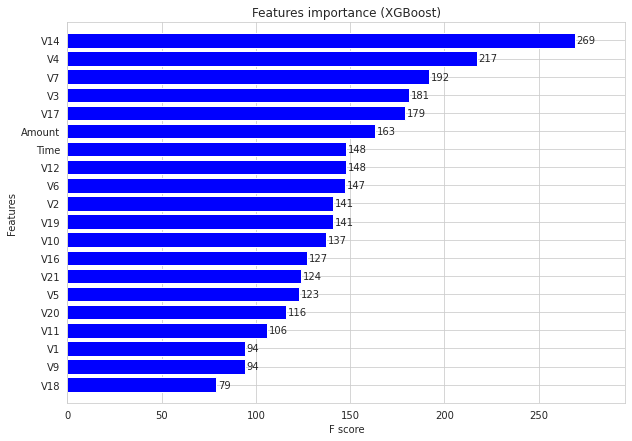

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(10,7))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="blue") 
plt.show()

### Conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models, Random Forest Classifier and XGBoost.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.887 (0.85 when using all features) when predicting the target for the test set.

We then experimented with a XGBoost model. In this case, se used the validation set for validation of the training model. The best validation score obtained was 0.984. Then we predicted target value from the test data, the AUC score obtained was 0.986 (0.976 when using all features).